**Anto Jeffry A**

Data analyst intern

# Merging and EDA analysis from April 2022 - March 2023

# NOTE: 

**All the plots visualized in this notebook are interactive make sure to hover around them to get more information. Also double-click the legends to spotlight any visualizations and more details.**

Please run the code cell below to make the visualizations appear if you are using Jupyter notebook

In [1]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
os.chdir("/Users/angelinoviya/Downloads/Excel files")
os.listdir()

['9.xlsx',
 '5.xlsx',
 '.DS_Store',
 '4.xlsx',
 '8.xlsx',
 '3.xlsx',
 '2.xlsx',
 '12.xlsx',
 '.~7.xlsx',
 'merged_data.xlsx',
 '1.xlsx',
 '11.xlsx',
 '10.xlsx',
 '7.xlsx',
 '6.xlsx']

# Merging

In [ ]:
directory = "/Users/angelinoviya/Downloads/Excel files" 

files = ['9.xlsx', '5.xlsx', '4.xlsx', '8.xlsx', '3.xlsx', '2.xlsx', '12.xlsx', '1.xlsx', '11.xlsx', '10.xlsx', '7.xlsx', '6.xlsx']

files = sorted(files, key=lambda x: int(os.path.splitext(x)[0]))

merged_data = pd.DataFrame()

for file in files:
    file_path = os.path.join(directory, file)
    data = pd.read_excel(file_path)
    merged_data = pd.concat([merged_data, data])

 
merged_data.to_excel("merged_data.xlsx", index=False)

In [4]:
df=pd.read_excel("merged_data.xlsx")
df.head()

,Month,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,2022-04-01,BANK OF BARODA,Public,1194104,75272375,2555872,9.288661e+09,12719853,2.294928e+10
1,2022-04-01,BANK OF INDIA,Public,165625,44965718,268651,8.180705e+08,8092268,1.273034e+10
2,2022-04-01,BANK OF MAHARASHTRA,Public,77592,12382388,93486,3.810745e+08,4249073,6.098393e+09
3,2022-04-01,CANARA BANK,Public,917871,47155319,920892,2.562248e+09,14796245,2.743993e+10
4,2022-04-01,CENTRAL BANK OF INDIA,Public,0,30407359,0,0.000000e+00,3516187,7.102464e+09


Lets convert the Month into a proper format

In [5]:
df['Month'] = pd.to_datetime(df['Month'])
df['Month'] = df['Month'].dt.strftime('%B %Y')
print(df['Month'])

0      April 2022
1      April 2022
2      April 2022
3      April 2022
4      April 2022
          ...    
497    March 2023
498    March 2023
499    March 2023
500    March 2023
501    March 2023
Name: Month, Length: 502, dtype: object


In [6]:
df.head()

,Month,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,April 2022,BANK OF BARODA,Public,1194104,75272375,2555872,9.288661e+09,12719853,2.294928e+10
1,April 2022,BANK OF INDIA,Public,165625,44965718,268651,8.180705e+08,8092268,1.273034e+10
2,April 2022,BANK OF MAHARASHTRA,Public,77592,12382388,93486,3.810745e+08,4249073,6.098393e+09
3,April 2022,CANARA BANK,Public,917871,47155319,920892,2.562248e+09,14796245,2.743993e+10
4,April 2022,CENTRAL BANK OF INDIA,Public,0,30407359,0,0.000000e+00,3516187,7.102464e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            502 non-null    object 
 1   bank_name        502 non-null    object 
 2   bank_type        502 non-null    object 
 3   credit_cards     502 non-null    int64  
 4   debit_cards      502 non-null    int64  
 5   cc_transactions  502 non-null    int64  
 6   cc_inr_value     502 non-null    float64
 7   dc_transactions  502 non-null    int64  
 8   dc_inr_value     502 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 35.4+ KB


In [8]:
df.isnull().sum()

Month              0
bank_name          0
bank_type          0
credit_cards       0
debit_cards        0
cc_transactions    0
cc_inr_value       0
dc_transactions    0
dc_inr_value       0
dtype: int64

In [9]:
df.columns

Index(['Month', 'bank_name', 'bank_type', 'credit_cards', 'debit_cards',
       'cc_transactions', 'cc_inr_value', 'dc_transactions', 'dc_inr_value'],
      dtype='object')

In [10]:
import pandas as pd
import plotly.graph_objects as go


# Filter numerical columns excluding categorical columns
numerical_columns = df.select_dtypes(include=['number']).columns

box_plot_traces = []

for column in numerical_columns:
    trace = go.Box(y=df[column], name=column)
    box_plot_traces.append(trace)

layout = go.Layout(title='Box Plots', yaxis=dict(title='Value'))

fig = go.Figure(data=box_plot_traces, layout=layout)

fig.show()

**As the values are too high make sure to double click the legends to spotlight the visualizations for accuracy**

In [11]:
import plotly.graph_objects as go

labels = ['Credit Cards', 'Debit Cards']
values = [df['credit_cards'].sum(), df['debit_cards'].sum()]

fig = go.Figure(go.Treemap(
    labels=labels,
    parents=['', ''],
    values=values,
))

fig.update_layout(title='Number of Credit Cards and Debit Cards')

fig.show()

**So, there are nearly 10.2 billion debit cards issued and 953.8 million credit cards issued from April 2022 to March 2023**

In [12]:
import plotly.express as px
fig = px.pie(df['bank_type'].value_counts(), names=df['bank_type'].value_counts().index, values=df['bank_type'].value_counts())
fig.update_layout(title='Bank Type Distribution')
fig.show()

**So, there are more number of private banks than anyother banks**

In [13]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots



fig = make_subplots(rows=2, cols=2, subplot_titles=['Credit Card Transactions vs INR Value', 'Debit Card Transactions vs INR Value',
                                                   'Credit Cards vs Debit Cards'])

# Add scatter plots to the subplots
fig.add_trace(go.Scatter(x=df['cc_transactions'], y=df['cc_inr_value'], mode='markers', name='Credit Card Transactions'), row=1, col=1)
fig.add_trace(go.Scatter(x=df['dc_transactions'], y=df['dc_inr_value'], mode='markers', name='Debit Card Transactions'), row=1, col=2)
fig.add_trace(go.Scatter(x=df['credit_cards'], y=df['debit_cards'], mode='markers', name='Credit Cards vs Debit Cards'), row=2, col=1)

fig.update_layout(title='Scatter Plots for Credit Cards and Debit Cards',
                  xaxis1_title='Credit Card Transactions',
                  yaxis1_title='INR Value',
                  xaxis2_title='Debit Card Transactions',
                  yaxis2_title='INR Value',
                  xaxis3_title='Credit Cards',
                  yaxis3_title='Debit Cards')


# Show the plot
fig.show()

In [14]:
from plotly import colors


debit_card_count_by_bank_type = df[df['debit_cards'] > 0].groupby('bank_type')['debit_cards'].count()

debit_colors = colors.qualitative.Plotly
fig1 = go.Figure(data=go.Bar(x=debit_card_count_by_bank_type.index, y=debit_card_count_by_bank_type,
                            marker_color=debit_colors))
fig1.update_layout(title='Debit Card Count by Bank Type', xaxis_title='Bank Type', yaxis_title='Count')

credit_card_count_by_bank_type = df[df['credit_cards'] > 0].groupby('bank_type')['credit_cards'].count()

credit_colors = colors.qualitative.D3
fig2 = go.Figure(data=go.Bar(x=credit_card_count_by_bank_type.index, y=credit_card_count_by_bank_type,
                            marker_color=credit_colors))
fig2.update_layout(title='Credit Card Count by Bank Type', xaxis_title='Bank Type', yaxis_title='Count')

fig1.show()
fig2.show()

**Private banks have more credit and debit cards than public and foreign banks**

In [15]:
import pandas as pd
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

fig = px.bar(df, x='bank_name', y=['cc_inr_value', 'dc_inr_value'], barmode='stack')

fig.update_layout(title='Credit Card and Debit Card INR Value by Bank',
                  xaxis_title='Bank Name',
                  yaxis_title='Total INR Value',
                  hovermode='x',  
                  hoverlabel=dict(namelength=0)  # Show full hover label 
                 )

fig.show()

**HDFC bank have more credit card transactioned money and State bank of India have more debit card transactioned money.**

In [16]:
import pandas as pd
import plotly.express as px

df_sorted = df.sort_values(['credit_cards', 'debit_cards'], ascending=[True,True])

fig = px.bar(df_sorted, y='bank_name', x=['credit_cards', 'debit_cards'], barmode='group', orientation='h')
fig.update_layout(title='Number of Credit Cards and Debit Cards by Bank', xaxis_title='Count', yaxis_title='Bank Name')
fig.update_layout(width=1000, height=800)  
fig.show()

**So HDFC bank issues the most number of credit cards whereas State bank of India issues most number of debit cards**

In [17]:
import pandas as pd
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Month'], y=df['cc_transactions'], mode='lines+markers', name='Credit Card Transactions',
                         hovertemplate='Month: %{x}<br>Credit Card Transactions: %{y}<extra></extra>'))

fig.add_trace(go.Scatter(x=df['Month'], y=df['dc_transactions'], mode='lines+markers', name='Debit Card Transactions',
                         hovertemplate='Month: %{x}<br>Debit Card Transactions: %{y}<extra></extra>'))

fig.update_layout(title='Credit Card and Debit Card Transactions Over Time', xaxis_title='Month',
                  yaxis_title='Number of Transactions')

fig.show()

**As we can see that from April 2022 to March 2023, every month, debit card transactions are more than credit card transactions**

In [18]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Month'], y=df['cc_inr_value'], mode='lines+markers', name='Credit Card INR Value',
                         hovertemplate='Month: %{x}<br>Credit Card INR Value: %{y}<extra></extra>'))

fig.add_trace(go.Scatter(x=df['Month'], y=df['dc_inr_value'], mode='lines+markers', name='Debit Card INR Value',
                         hovertemplate='Month: %{x}<br>Debit Card INR Value: %{y}<extra></extra>'))

fig.update_layout(title='Credit Card and Debit Card INR Value Over Time', xaxis_title='Month',
                  yaxis_title='INR Value')

fig.show()

**On very month, people spend more money with credit cards than debit cards**

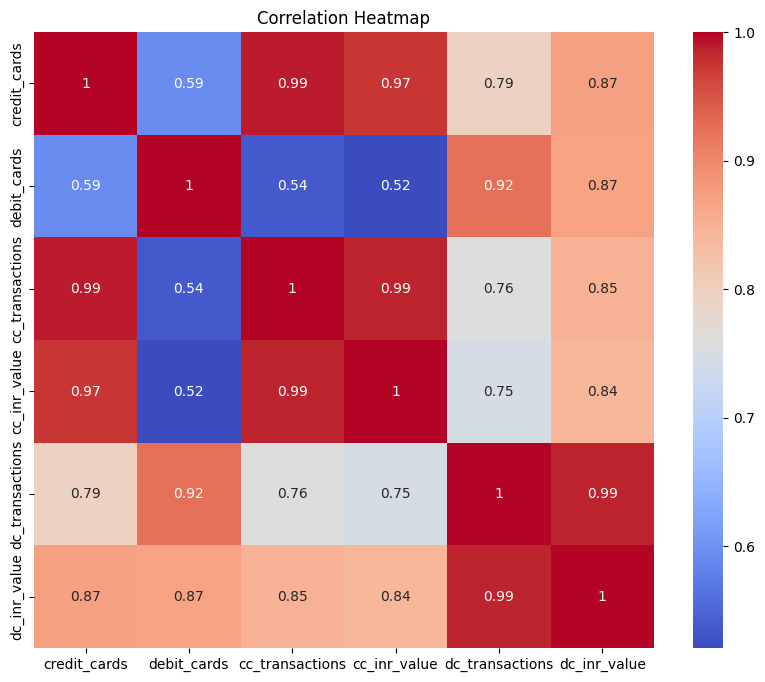

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

df_numeric = df.select_dtypes(include='number')

corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')

plt.show()

The correlation analysis reveals strong positive relationships between the following pairs of variables:

Credit Cards and Credit Card Transactions: There is a very strong positive correlation (0.99) between the number of credit cards and credit card transactions.

Credit Cards and Credit Card INR Value: There is a high positive correlation (0.97) between the number of credit cards and the INR value of credit card transactions.

Debit Card Transactions and Debit Card INR Value: There is a strong positive correlation (0.99) between the number of debit card transactions and the INR value of debit card transactions.

These findings indicate that there is a positive association between the number of cards and transactional activity for both credit cards and debit cards. 